types of supervised algo:-
1. regression - where target variable is contionuse
2. classification - where target variable is  discrete(0 or 1)/classes

coding linear 1d regresiion from scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\abhishek\Desktop\tvmarketing.csv")

In [4]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
x=np.array(list(df["TV"]))
y=np.array(list(df["Sales"]))

In [6]:
x,y

(array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
        199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
         69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
        240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
        266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
        175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
        262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
        102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
         26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
        239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
        134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
        135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
         13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
         76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
      

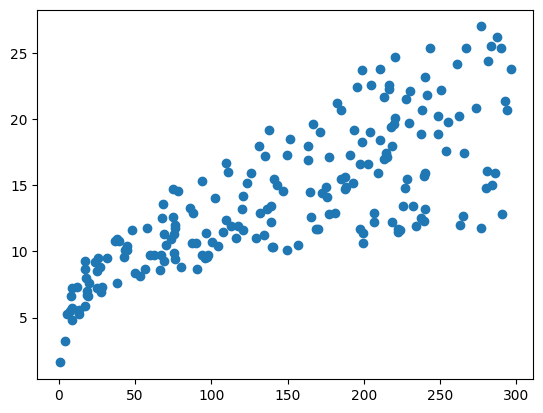

In [7]:
plt.scatter(x,y)

In [8]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3)
X_train.shape

(140,)

In [9]:
def fit(x_train, y_train):  #fits a line on training data/learns
    num = (x_train*y_train).mean() - x_train.mean() * y_train.mean()
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m * x_train.mean()
    return m, c
def predict(x, m, c):   # return output
    return m * x + c

def score(y_truth, y_pred):  #tells how good the algorithm is
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth - y_truth.mean())**2).sum()
    return 1 - u/v

def cost (x, y, m , c):  #for what value of m the cost/error is minimized
    return ((y - m * x - c)**2).mean()

In [10]:
m, c = fit(X_train, Y_train)
# test data
y_test_pred = predict(X_test, m, c)
print("Test Score: ",score(Y_test, y_test_pred))

#train data
y_train_pred = predict(X_train, m, c)
print("Train Score: ", score(Y_train, y_train_pred))
print("M, C ", m , c)
print("Cost on training data ", cost(X_train,Y_train, m, c ))

Test Score:  0.6509516610051859
Train Score:  0.5899434272678419
M, C  0.04579388754982328 7.1487184836934485
Cost on training data  10.610530776438308


In [11]:
x1=X_train
y1=m*x1+c

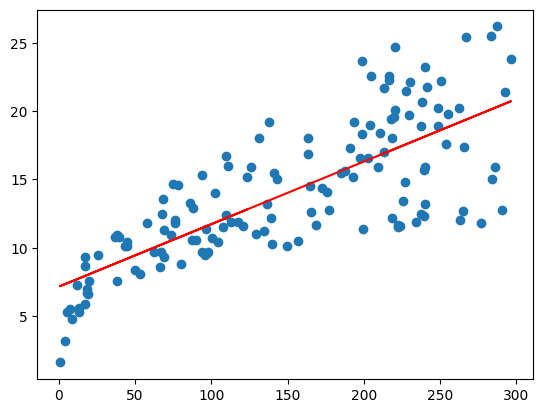

In [29]:
plt.scatter(X_train,Y_train)   #plot on train
plt.plot(x1,y1,c="red")

In [13]:
x2=X_test
y2=m*x2+c

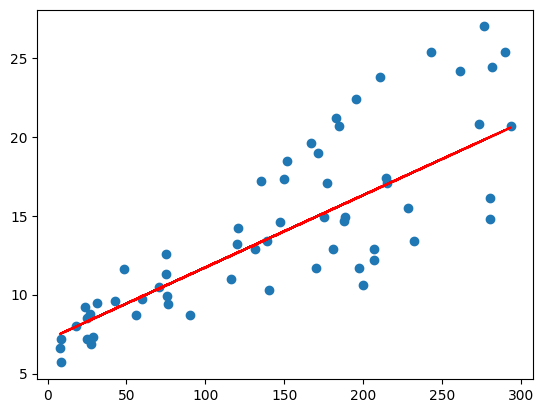

In [28]:
plt.scatter(X_test,Y_test)   #plot on test
plt.plot(x2,y2,c="red")

By using inbuilt linear regression 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
alg1=LinearRegression()

In [17]:
nxtrain=X_train.reshape(-1,1)
nxtest=X_test.reshape(-1,1)

In [18]:
alg1.fit(nxtrain,Y_train)

LinearRegression()

In [19]:
yitpr=alg1.predict(nxtest)

In [20]:
yitrpr=alg1.predict(nxtrain)
yitrpr

array([16.79749059, 18.63840487, 19.81988717, 11.2564302 , 10.21232956,
        8.0371199 , 14.6360191 , 10.3176555 , 16.92113409, 18.2171011 ,
       16.0189945 , 19.29325746, 10.56952188, 11.61362252,  7.48301386,
       13.69266501, 17.21421497, 13.07444753, 18.14383088, 18.13467211,
       20.16792071, 12.68977888, 18.54223771, 17.0768333 ,  7.54254592,
       11.53119352, 17.55308974, 15.04816409, 15.19470453, 10.72980049,
       16.42198071, 11.55409047, 16.19759066, 18.52392015,  8.89804499,
       14.32004127, 12.90501015, 17.58972485, 14.00864284,  7.74861841,
       10.28102039, 12.21810184, 11.44876452, 17.40654929, 20.46100159,
        9.43841286, 11.74642479,  8.00506418, 13.38584597,  9.18654648,
       14.86040915, 20.31904054,  7.92263518, 20.24577032, 12.06698201,
       11.19231875, 10.25354406, 13.61939479, 17.15010352, 16.29833722,
        8.321042  , 20.56174815, 16.49525093, 17.1180478 , 20.13586499,
       10.30849672, 18.02018739, 16.25712272, 15.89993039,  7.68

In [21]:
mi=alg1.coef_[0] #slope
ci=alg1.intercept_ #intercept
mi,ci

(0.04579388754982331, 7.148718483693444)

In [25]:
# we dont need to calculate predictions for inbuilt score function , it will predict for by its own self.
scite=alg1.score(nxtest,Y_test) 
scitr=alg1.score(nxtrain,Y_train)

comparision b/w inbuilt and ownbuilt

In [23]:
print("Test Score: ",score(Y_test, y_test_pred))
y_train_pred = predict(X_train, m, c)
print("Train Score: ", score(Y_train, y_train_pred))
print("M, C ", m , c)
print("Cost on training data ", cost(X_train,Y_train, m, c ))

Test Score:  0.6509516610051859
Train Score:  0.5899434272678419
M, C  0.04579388754982328 7.1487184836934485
Cost on training data  10.610530776438308


In [26]:
print("Test Score: ",scite)
print("Train Score: ", scitr)
print("M, C ", mi , ci)

Test Score:  0.650951661005186
Train Score:  0.5899434272678421
M, C  0.04579388754982331 7.148718483693444
